In [ ]:
!pip install matplotlib
!pip install numpy
!pip install pandas

In [3]:
!pip install jax


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.4 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 1.9 MB/s eta 0:00:00a 0:00:01


In [4]:
!pip install sympy

In [23]:
!pip install jaxlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 MB 2.3 MB/s eta 0:00:0000:0100:01m


In [25]:
pip install --upgrade jax jaxlib


Note: you may need to restart the kernel to use updated packages.


QUESTION 1

For matrix multiplication of two matrices A and B,  we need to perform dot product of the i-th row of A and the j-th column of B, to get the ijth element of the resulting matrix C. This means k multiplications and k-1 additions for a single element. Since the resulting matrix C has dimensions (n, m), you need to compute n * m elements.

Thus for each term we need to do k-1 additions and k multiplications.

Total number of elements = n * m
Total number of multiplications = n * m * k
Total number of additions = n * m * k-1


QUESTION 2

In [12]:
start_time = time.time()
def multiply_matrices_lists(matrix1, matrix2):
    result = [[0 for _ in range(len(matrix2[0]))] for _ in range(len(matrix1))]
    
    for i in range(len(matrix1)):
        for j in range(len(matrix2[0])):
            for k in range(len(matrix2)):
                result[i][j] += matrix1[i][k] * matrix2[k][j]
    
    return result

matrix1 = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
matrix2 = [[9, 8, 7], [6, 5, 4], [3, 2, 1]]

result_lists = multiply_matrices_lists(matrix1, matrix2)

end_time = time.time()
print("Result1:")
for row in result_lists:
    print(row)

print("Time Taken:", end_time - start_time)

Result1:
[30, 24, 18]
[84, 69, 54]
[138, 114, 90]
Time Taken: 0.00026702880859375


In [13]:
import numpy as np

start_time = time.time()
def multiply_matrices_numpy(matrix1, matrix2):
    return np.dot(matrix1, matrix2)

matrix1_np = np.array(matrix1)
matrix2_np = np.array(matrix2)

result_numpy = multiply_matrices_numpy(matrix1_np, matrix2_np)

end_time = time.time()
print("Result2:")
print(result_numpy)
print("Time Taken:", end_time - start_time)

Result2:
[[ 30  24  18]
 [ 84  69  54]
 [138 114  90]]
Time Taken: 0.0002701282501220703


QUESTION 3

If we use the Prescribed method, the time complexity will come out to be n^2. Where n is the number of elements in the array.

EXPLANATION:
Lets assume that the length of the array is L. To find the max element the complexity will be proportional to L, similarly to find second largest element the the complexity will be proportional to L-1. The median will be (L/2)th largest element. So the complexity will be proportional to L/2. If we add all the complexities, L + L-1 + L-2 ... +
L/2. It will be proportional to L^2. 

In [10]:
#PRESCRIBED METHOD
import time

start_time=time.time()

def find_median_linear_pass(arr):
    n=len(arr)
    middle_index = n//2
    
    while n>1:
        max_index=0
        for i in range(1, n):
            if arr[i]>arr[max_index]:
                max_index=i
        
        arr[n-1],arr[max_index]=arr[max_index],arr[n-1]
        
        n-=1 
        
        if middle_index >= n:
            return arr[middle_index]

end_time=time.time()
print("Time Taken:" ,end_time - start_time, "seconds")


arr = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
median=find_median_linear_pass(arr)
print("Median:", median)


Time Taken: 0.00025081634521484375 seconds
Median: 4


In [13]:
#QUICKSELECT
import time

def partition(arr, low, high):
    pivot=arr[high]
    i=low-1
    
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i+1

def quick_select(arr, low, high, k):
    if low <= high:
        pivot_index = partition(arr, low, high)

        if pivot_index == k:
            return arr[pivot_index]
        elif pivot_index < k:
            return quick_select(arr, pivot_index+1, high, k)
        else:
            return quick_select(arr, low, pivot_index-1, k)

def find_median_quick_select(arr):
    n = len(arr)
    middle_index = n // 2
    
    start_time = time.time()
    
    if n % 2 == 0:
        median = (quick_select(arr, 0, n-1, middle_index-1) + quick_select(arr, 0, n-1, middle_index))/2
    else:
        median = quick_select(arr, 0, n-1, middle_index)
    
    end_time = time.time()
    time_taken = end_time-start_time
    
    return median, time_taken


arr = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
median, time_ = find_median_quick_select(arr)

print("Median:", median)
print("Time Taken:", time_, "seconds")


Median: 4
Time Taken: 1.71661376953125e-05 seconds


In [6]:
#NUMPY MEDIAN

import numpy as np
start_time = time.time()

arr = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])

median_numpy = np.median(arr)
end_time = time.time()
time_taken = end_time - start_time

print("Time Taken:" ,time_taken )

print("Median (numpy):", median_numpy)


Time Taken: 0.001300811767578125
Median (numpy.median): 4.0


In [ ]:
#QUESTION 4

GRADIENT CALCULATION

$$
x^2 \cdot y + y^3 \cdot \sin(x)
$$


$$
\
\frac{\partial}{\partial x}(f(x, y)) = 2xy + y^3 \cdot \cos(x)
\
$$

$$
\
\frac{\partial}{\partial y}(f(x, y)) = x^2 + 3y^2 \cdot \sin(x)
\
$$


$$
\
\text{Gradient vector:}
\
$$

$$
\
\nabla f(x, y) = \left[2xy + y^3 \cdot \cos(x), x^2 + 3y^2 \cdot \sin(x)\right]
\
$$

In [11]:
#QUESTION 5
import jax
import jax.numpy as jnp
import numpy as np

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def analytical_gradient(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2+3*y**2*jnp.sin(x)
    return df_dx, df_dy

grad_f = jax.grad(f)

np.random.seed(0)  
x_values = np.random.uniform(size=(5,))
y_values = np.random.uniform(size=(5,))

for i in range(len(x_values)):
    x, y = x_values[i], y_values[i]
    analytical_grad = analytical_gradient(x, y)
    jax_grad = grad_f(x, y)
    
    print("Points:", x, ",", y)
    print("Analytical Gradient:", analytical_grad)
    print("JAX Gradient:", jax_grad)
    print()


Points: 0.5488135039273248 , 0.6458941130666561
Analytical Gradient: (Array(0.93883353, dtype=float32), Array(0.9540925, dtype=float32))
JAX Gradient: 0.93883353

Points: 0.7151893663724195 , 0.4375872112626925
Analytical Gradient: (Array(0.6891746, dtype=float32), Array(0.8881959, dtype=float32))
JAX Gradient: 0.68917453

Points: 0.6027633760716439 , 0.8917730007820798
Analytical Gradient: (Array(1.6592677, dtype=float32), Array(1.7158709, dtype=float32))
JAX Gradient: 1.6592677

Points: 0.5448831829968969 , 0.9636627605010293
Analytical Gradient: (Array(1.8154762, dtype=float32), Array(1.7408998, dtype=float32))
JAX Gradient: 1.8154762

Points: 0.4236547993389047 , 0.3834415188257777
Analytical Gradient: (Array(0.376286, dtype=float32), Array(0.36081004, dtype=float32))
JAX Gradient: 0.37628597



In [15]:
#QUESTION 6
import sympy as sp


x, y = sp.symbols('x y')

f=x**2*y+y**3*sp.sin(x)


df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)


gradient_numeric = sp.lambdify((x, y), (df_dx, df_dy), 'numpy')


x_val = 2.0
y_val = 3.0

analytical_grad = analytical_gradient(x_val, y_val)
numeric_grad = gradient_numeric(x_val, y_val)

print("Analytical Gradient:", analytical_grad)
print("Numeric Gradient (SymPy):", numeric_grad)


Symbolic Gradient:
df/dx = 2*x*y + y**3*cos(x)
df/dy = x**2 + 3*y**2*sin(x)
Analytical Gradient: (Array(0.7640352, dtype=float32, weak_type=True), Array(28.55103, dtype=float32, weak_type=True))
Numeric Gradient (SymPy): (0.7640354132271554, 28.551030524293406)


In [16]:
#QUESTION 7
def print_data(data):
    for year in data:
        print(f"Academic Year: {year['year']}")
        for branch in year['branches']:
            print(f"  Study Branch: {branch['name']}")
            for student in branch['students']:
                print(f"    Roll Number: {student['roll_number']}, Name: {student['name']}")
                print("    Marks:")
                for subject, mark in student['marks'].items():
                    print(f"      {subject}: {mark}")


data = [
    {
        'year': 2022,
        'branches': [
            {
                'name': 'Branch 1',
                'students': [
                    {'roll_number': 1, 'name': 'N', 'marks': {'Maths': 100, 'English': 70}}
                ]
            }
        ]
    }
]

print_data(data)


Academic Year: 2022
  Study Branch: Branch 1
    Roll Number: 1, Name: N
    Marks:
      Maths: 100
      English: 70


In [6]:
#QUESTION 8
class Data:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)


class AcademicYear:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)


class StudentRecord:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks


class StudyBranch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student_record(self, student_record):
        self.students.append(student_record)


def print_data(data):
    for year in data.years:
        print(f"Academic Year: {year.year}")
        for branch in year.branches:
            print(f"  Study Branch: {branch.name}")
            for student in branch.students:
                print(f"    Roll Number: {student.roll_number}, Name: {student.name}")
                print("    Marks:")
                for subject, mark in student.marks.items():
                    print(f"      {subject}: {mark}")


student_1 = StudentRecord(1, 'N', {'Maths': 100, 'English': 70})

branch_1_2022 = StudyBranch('Branch 1')
branch_1_2022.add_student_record(student_1)

year_2022 = AcademicYear(2022)
year_2022.add_branch(branch_1_2022)

data = Data()
data.add_year(year_2022)

print_data(data)


Academic Year: 2022
  Study Branch: Branch 1
    Roll Number: 1, Name: N
    Marks:
      Maths: 100
      English: 70


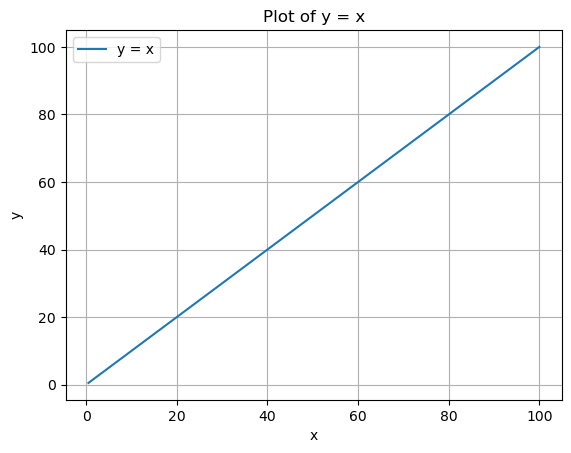

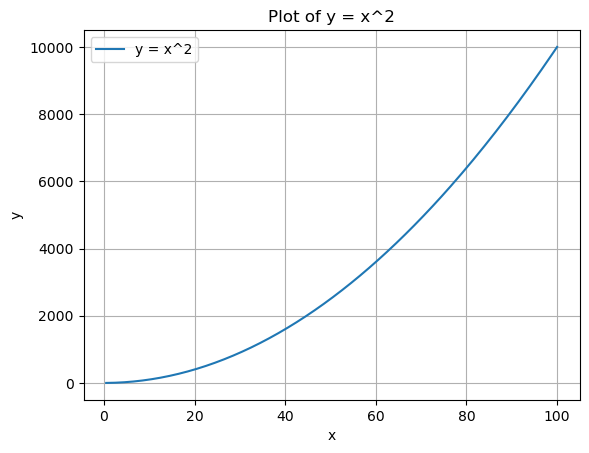

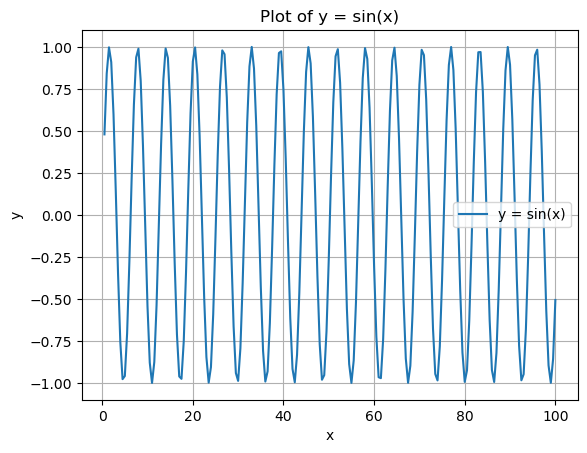

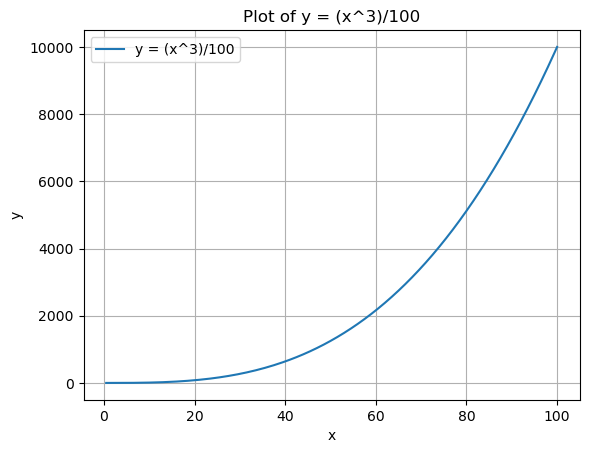

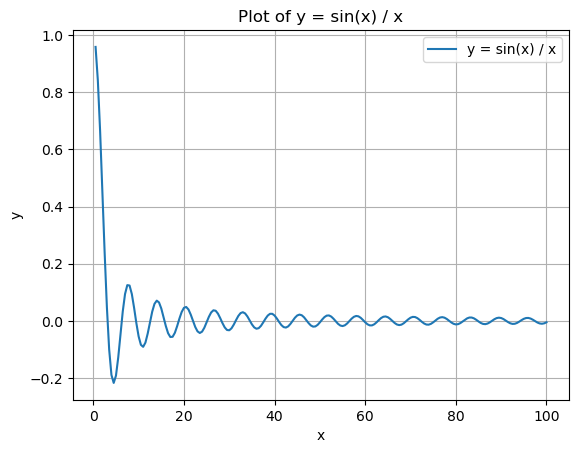

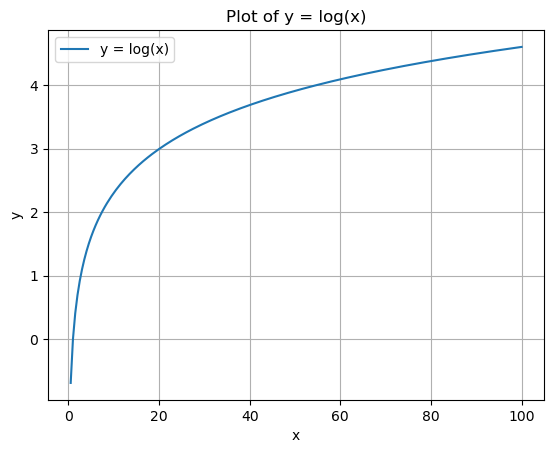

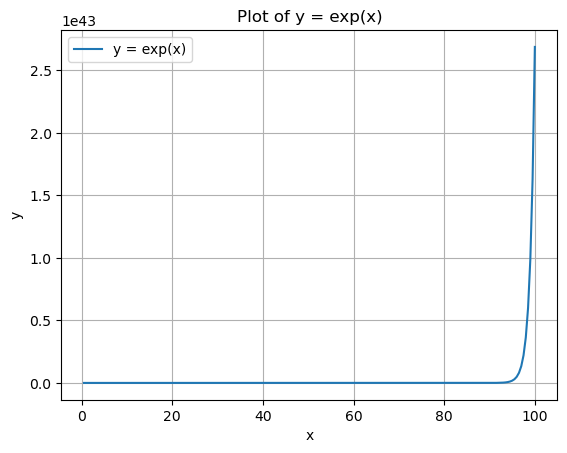

In [17]:
#QUESTION 9
import matplotlib.pyplot as plt
import numpy as np

def plot_function(func, domain_start, domain_end, step, label=None):
    x = np.arange(domain_start, domain_end + step, step)

    y = func(x)

    plt.plot(x, y, label=label)
    plt.title(f'Plot of {label if label else "Function"}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_function(lambda x: x, 0.5, 100.0, 0.5, label='y = x')

plot_function(lambda x: x**2, 0.5, 100.0, 0.5, label='y = x^2')

plot_function(np.sin, 0.5, 100.0, 0.5, label='y = sin(x)')

plot_function(lambda x: (x**3)/100, 0.5, 100.0, 0.5, label='y = (x^3)/100')

plot_function(lambda x: np.sin(x) / x, 0.5, 100.0, 0.5, label='y = sin(x) / x')

plot_function(np.log, 0.5, 100.0, 0.5, label='y = log(x)')

plot_function(np.exp, 0.5, 100.0, 0.5, label='y = exp(x)')

In [8]:
#QUESTION 10
import numpy as np
import pandas as pd

random_matrix = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])

print("DataFrame:")
print(df)


highest_std_col = df.std().idxmax()


lowest_mean_row = df.mean(axis=1).idxmin()

print("Column with the highest standard deviation:", highest_std_col)
print("Row with the lowest mean:", lowest_mean_row)


DataFrame:
           a         b         c         d         e
0   1.265379  1.160749  1.116639  1.693139  1.405380
1   1.413893  1.651606  1.974087  1.934362  1.035691
2   1.755810  1.652008  1.201086  1.975065  1.064408
3   1.420948  1.852518  1.205126  1.009856  1.997669
4   1.621254  1.295252  1.644385  1.085107  1.941199
5   1.172307  1.636632  1.244826  1.290375  1.129794
6   1.700860  1.959843  1.389421  1.605316  1.555124
7   1.159736  1.098513  1.087364  1.201798  1.549996
8   1.024369  1.206024  1.024202  1.131740  1.955453
9   1.056180  1.759855  1.111368  1.445281  1.802809
10  1.591808  1.293282  1.007983  1.883413  1.270808
11  1.699302  1.408928  1.809736  1.159548  1.722316
12  1.917268  1.206078  1.175290  1.595576  1.256847
13  1.746839  1.146767  1.163208  1.827425  1.183550
14  1.805086  1.607085  1.218981  1.118082  1.212483
15  1.259535  1.353328  1.265236  1.972361  1.947198
16  1.665034  1.904860  1.154536  1.671116  1.341146
17  1.508879  1.559188  1.911530  1

In [9]:
#QUESTION 11
import numpy as np
import pandas as pd


random_matrix = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

print("Modified DataFrame:")
print(df)

num_lt8_rows = (df['g'] == 'LT8').sum()

std_lt8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_gt8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("Number of rows where 'g' is 'LT8':", num_lt8_rows)
print("Standard deviation of 'f' for 'LT8':", std_lt8)
print("Standard deviation of 'f' for 'GT8':", std_gt8)


Modified DataFrame:
           a         b         c         d         e         f    g
0   1.940563  1.935300  1.551036  1.187689  1.327031  7.941619  LT8
1   1.933476  1.863005  1.315207  1.048967  1.192762  7.353417  LT8
2   1.294657  1.707745  1.022047  1.654214  1.555382  7.234045  LT8
3   1.903219  1.122693  1.153556  1.612266  1.476731  7.268465  LT8
4   1.926515  1.017609  1.756230  1.368121  1.498585  7.567060  LT8
5   1.762807  1.386474  1.246701  1.098420  1.011489  6.505892  LT8
6   1.842842  1.931857  1.486315  1.353332  1.787504  8.401851  GT8
7   1.498012  1.595214  1.064509  1.581793  1.915006  7.654534  LT8
8   1.713346  1.758120  1.555949  1.773184  1.504837  8.305436  GT8
9   1.878586  1.416014  1.532143  1.914883  1.713038  8.454665  GT8
10  1.840522  1.167526  1.998620  1.048869  1.397015  7.452552  LT8
11  1.454985  1.890131  1.720239  1.066881  1.870236  8.002472  GT8
12  1.051943  1.043587  1.383113  1.610927  1.965329  7.054899  LT8
13  1.749346  1.738854  1.11

In [10]:
#QUESTION 12
import numpy as np

scalar = 5
array = np.array([1, 2, 3, 4, 5])

result = scalar * array
print("Scalar Broadcasting:")
print(result)

array1 = np.array([[1, 2, 3], [4, 5, 6]])
array2 = np.array([10, 20, 30])

result = array1 + array2
print("Array Broadcasting:")
print(result)


Scalar Broadcasting:
[ 5 10 15 20 25]
Array Broadcasting:
[[11 22 33]
 [14 25 36]]


Broadcasting
It is a method to do different arithmetic operations on arrays which may or may not be of the same size. Either of the following two conditions should be satisfied perform broadcasting:
i) if the sizes of the arrays are equal
ii) if one of them is 1.

In [11]:
#QUESTION 13
import numpy as np

def custom_argmin(arr):
    min_index = 0  

    for i in range(1, len(arr)):
        if arr[i] < arr[min_index]:
            min_index = i

    return min_index


arr = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])
result_custom = custom_argmin(arr)
result_np = np.argmin(arr)

print("Custom argmin:", result_custom)
print("np.argmin:", result_np)


Custom argmin: 1
np.argmin: 1
